# Car Used Regression

### Import Library And Read Dataset

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
# read dataset

df1 = pd.read_csv('./used_cars.csv')
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### Exploration Of The Dataset

In [263]:
# shape of data set and name columns

print(df1.shape)
print(df1.columns)

(8128, 13)
Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')


In [264]:
# checking the data types of the columns

df1.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [265]:
# get general information about data set

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [266]:
# checking for the missing values

df1.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [267]:
# Find duplicate lines

df1[df1.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
291,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
296,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
370,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
371,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
372,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
7988,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
8117,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [268]:
# drop duplicate line

df1 = df1.drop_duplicates()
df1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [269]:
# checking duplicate and get new shape

print(df1[df1.duplicated()])
print(df1.shape)

Empty DataFrame
Columns: [name, year, selling_price, km_driven, fuel, seller_type, transmission, owner, mileage, engine, max_power, torque, seats]
Index: []
(6926, 13)


In [270]:
# with nunique show different types for each feature

df1.nunique()

name             2058
year               29
selling_price     677
km_driven         921
fuel                4
seller_type         3
transmission        2
owner               5
mileage           393
engine            121
max_power         322
torque            441
seats               9
dtype: int64

In [271]:
# the number of different values for the fuel column

df1['fuel'].value_counts()

fuel
Diesel    3755
Petrol    3077
CNG         56
LPG         38
Name: count, dtype: int64

In [272]:
# the number of different values for the seller_type column

df1['seller_type'].value_counts()

seller_type
Individual          6218
Dealer               681
Trustmark Dealer      27
Name: count, dtype: int64

In [273]:
# the number of different values for the transmission column

df1['transmission'].value_counts()

transmission
Manual       6342
Automatic     584
Name: count, dtype: int64

In [274]:
# the number of different values for the owner column

df1['owner'].value_counts()

owner
First Owner             4242
Second Owner            1974
Third Owner              536
Fourth & Above Owner     169
Test Drive Car             5
Name: count, dtype: int64

In [275]:
# Statistical description of numerical data sets

df1.describe()

,year,selling_price,km_driven,seats
count,6926.000000,6.926000e+03,6.926000e+03,6718.000000
mean,2013.420300,5.172707e+05,7.399568e+04,5.434653
std,4.078286,5.197670e+05,5.835810e+04,0.984230
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.500000e+05,4.000000e+04,5.000000
50%,2014.000000,4.000000e+05,7.000000e+04,5.000000
75%,2017.000000,6.335000e+05,1.000000e+05,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [276]:
# Statistical description of non-numerical data sets

df1.describe(exclude=[np.number])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6926,6926,6926,6926,6926,6718,6718,6721,6717
unique,2058,4,3,2,5,393,121,322,441
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,118,3755,6218,6342,4242,210,907,324,472


### Change data type

In [277]:
# drop torque column

df2 = df1.drop(['torque'], axis=1)
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [278]:
# First, remove the units related to columns 'mileage', 'engine', and 'max_power'

df2['mileage'] = df2['mileage'].str.replace('kmpl','')
df2['mileage'] = df2['mileage'].str.replace('km/kg','')
df2['engine'] = df2['engine'].str.replace('CC','')
df2['max_power'] = df2['max_power'].str.replace('bhp','')

df2.head(15)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3,1061,57.5,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1,796,37,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364,67.1,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0,1399,68.1,5.0


In [279]:
# change datatype to integer with labelencoder for 'fuel', 'seller_type', 'transmission' and 'owner' columns

from sklearn.preprocessing import LabelEncoder

change_data_type = LabelEncoder()

df2['name'] = change_data_type.fit_transform(df2['name'])
df2['fuel'] = change_data_type.fit_transform(df2['fuel'])
df2['seller_type'] = change_data_type.fit_transform(df2['seller_type'])
df2['transmission'] = change_data_type.fit_transform(df2['transmission'])
df2['owner'] = change_data_type.fit_transform(df2['owner'])

df2['name'] = df2['name'].astype(int)
df2['fuel'] = df2['fuel'].astype(int)
df2['seller_type'] = df2['seller_type'].astype(int)
df2['transmission'] = df2['transmission'].astype(int)
df2['owner'] = df2['owner'].astype(int)
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   int64  
 1   year           6926 non-null   int64  
 2   selling_price  6926 non-null   int64  
 3   km_driven      6926 non-null   int64  
 4   fuel           6926 non-null   int64  
 5   seller_type    6926 non-null   int64  
 6   transmission   6926 non-null   int64  
 7   owner          6926 non-null   int64  
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6721 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(1), int64(8), object(3)
memory usage: 703.4+ KB
None


In [280]:
# First, we put the numerical and object data in separate dataframes to manage the null data in the next step.


df2_number_features = df2.select_dtypes(include=['number'])

df2_object_features = df2.select_dtypes(include=['object'])
print(f"Object Features: \n{df2_object_features}\n")

Object Features: 
     mileage engine max_power
0      23.4   1248        74 
1     21.14   1498    103.52 
2      17.7   1497        78 
3      23.0   1396        90 
4      16.1   1298      88.2 
...      ...    ...       ...
8121   18.9    998      67.1 
8122  22.54   1396     88.73 
8123   18.5   1197     82.85 
8124   16.8   1493       110 
8125   19.3   1248      73.9 

[6926 rows x 3 columns]



#### fill missing values by simpleimputer class

In [281]:
# Using this class, we can fill empty data with most repeated values

from sklearn.impute import SimpleImputer

# for 'mileage', 'engine', 'max_power'
imputer1 = SimpleImputer(strategy='most_frequent')
df2_object_features = pd.DataFrame(imputer1.fit_transform(df2_object_features), columns=df2_object_features.columns)

# for 'seats'
imputer2 = SimpleImputer(strategy='constant', fill_value=5)
df2_number_features = pd.DataFrame(imputer2.fit_transform(df2_number_features), columns=df2_number_features.columns)


In [303]:
# After filling the empty data, we can concat the data frames in a new data frame

df2_object_features.reset_index(drop=True, inplace=True)
df2_number_features.reset_index(drop=True, inplace=True)

df3 = pd.concat([df2_number_features, df2_object_features], axis=1)
df3.head(15)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage,engine,max_power
0,1307.0,2014.0,450000.0,145500.0,1.0,1.0,1.0,0.0,5.0,23.4,1248,74
1,1607.0,2014.0,370000.0,120000.0,1.0,1.0,1.0,2.0,5.0,21.14,1498,103.52
2,385.0,2006.0,158000.0,140000.0,3.0,1.0,1.0,4.0,5.0,17.7,1497,78
3,781.0,2010.0,225000.0,127000.0,1.0,1.0,1.0,0.0,5.0,23.0,1396,90
4,1349.0,2007.0,130000.0,120000.0,3.0,1.0,1.0,0.0,5.0,16.1,1298,88.2
5,693.0,2017.0,440000.0,45000.0,3.0,1.0,1.0,0.0,5.0,20.14,1197,81.86
6,1397.0,2007.0,96000.0,175000.0,2.0,1.0,1.0,0.0,5.0,17.3,1061,57.5
7,1064.0,2001.0,45000.0,5000.0,3.0,1.0,1.0,2.0,4.0,16.1,796,37
8,1908.0,2011.0,350000.0,90000.0,1.0,1.0,1.0,0.0,5.0,23.59,1364,67.1
9,286.0,2013.0,200000.0,169000.0,1.0,1.0,1.0,0.0,5.0,20.0,1399,68.1


In [304]:
# change datatype object to integer

df3['engine'] = df3['engine'].astype(dtype='int64')
df3['max_power'] = pd.to_numeric(df3['max_power'], errors='coerce')
df3['mileage'] = pd.to_numeric(df3['mileage'], errors='coerce')


In [305]:
# checking for the missing values

df3.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
seats            0
mileage          0
engine           0
max_power        1
dtype: int64

In [306]:
# Find the row that contains the empty member

df3[df3.isnull().any(axis=1)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage,engine,max_power
4273,1234.0,2000.0,80000.0,100000.0,0.0,1.0,1.0,2.0,8.0,10.9,796,NaN


In [307]:
# drop a row that has an empty value

df3 = df3.dropna()
df3[df3.isnull().any(axis=1)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage,engine,max_power


In [308]:
df3.dtypes

name             float64
year             float64
selling_price    float64
km_driven        float64
fuel             float64
seller_type      float64
transmission     float64
owner            float64
seats            float64
mileage          float64
engine             int64
max_power        float64
dtype: object

In [309]:
# get describe for latest dataframe

df3.describe()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage,engine,max_power
count,6925.000000,6925.000000,6.925000e+03,6.925000e+03,6925.000000,6925.000000,6925.000000,6925.000000,6925.000000,6925.000000,6925.000000,6925.000000
mean,1052.758556,2013.422238,5.173338e+05,7.399192e+04,1.886209,0.905560,0.915668,0.905993,5.421227,19.449567,1425.489675,87.320562
std,536.433069,4.075390,5.197780e+05,5.836147e+04,1.002764,0.305504,0.277905,1.260301,0.971747,3.988008,487.003391,31.384119
min,0.000000,1983.000000,2.999900e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,624.000000,0.000000
25%,630.000000,2011.000000,2.500000e+05,4.000000e+04,1.000000,1.000000,1.000000,0.000000,5.000000,16.950000,1197.000000,68.000000
50%,1098.000000,2014.000000,4.000000e+05,7.000000e+04,1.000000,1.000000,1.000000,0.000000,5.000000,19.300000,1248.000000,81.800000
75%,1408.000000,2017.000000,6.340000e+05,1.000000e+05,3.000000,1.000000,1.000000,2.000000,5.000000,22.320000,1498.000000,99.000000
max,2057.000000,2020.000000,1.000000e+07,2.360457e+06,3.000000,2.000000,1.000000,4.000000,14.000000,42.000000,3604.000000,400.000000


## Scaling the numerical features(Standardization and Normalization)

In [310]:
# standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric_columns = df3.select_dtypes(include=['number']).columns
df3[numeric_columns] = scaler.fit_transform(df3[numeric_columns])
df3.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage,engine,max_power
0,0.473982,0.141779,-0.129553,1.225350,-0.88383,0.309152,0.303478,-0.718922,-0.433506,0.990650,-0.364479,-0.424467
1,1.033272,0.141779,-0.283476,0.788387,-0.88383,0.309152,0.303478,0.868115,-0.433506,0.423910,0.148902,0.516204
2,-1.244902,-1.821365,-0.691372,1.131103,1.11080,0.309152,0.303478,2.455151,-0.433506,-0.438739,0.146848,-0.297005
3,-0.506639,-0.839793,-0.562461,0.908337,-0.88383,0.309152,0.303478,-0.718922,-0.433506,0.890342,-0.060558,0.085382
4,0.552283,-1.575972,-0.745245,0.788387,1.11080,0.309152,0.303478,-0.718922,-0.433506,-0.839970,-0.261803,0.028024


## data correlation

In [311]:
df3.corr()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage,engine,max_power
name,1.000000,-0.022402,-0.021634,0.092103,-0.118246,0.049034,0.040277,0.007535,0.087994,-0.014851,0.061777,-0.049910
year,-0.022402,1.000000,0.433037,-0.377092,-0.068288,-0.130483,-0.140962,-0.452213,0.043592,0.351050,-0.001680,0.169667
selling_price,-0.021634,0.433037,1.000000,-0.165577,-0.241631,-0.248635,-0.462673,-0.224039,0.164357,-0.105355,0.444679,0.691486
km_driven,0.092103,-0.377092,-0.165577,1.000000,-0.271922,0.109402,0.118641,0.249416,0.200933,-0.195924,0.246862,0.036944
fuel,-0.118246,-0.068288,-0.241631,-0.271922,1.000000,0.037518,-0.028221,-0.014865,-0.342683,-0.097713,-0.506392,-0.298842
seller_type,0.049034,-0.130483,-0.248635,0.109402,0.037518,1.000000,0.181757,0.145360,0.026992,-0.007416,-0.071788,-0.182620
transmission,0.040277,-0.140962,-0.462673,0.118641,-0.028221,0.181757,1.000000,0.079213,0.017112,0.171522,-0.218897,-0.438267
owner,0.007535,-0.452213,-0.224039,0.249416,-0.014865,0.145360,0.079213,1.000000,-0.003040,-0.169967,0.027941,-0.058362
seats,0.087994,0.043592,0.164357,0.200933,-0.342683,0.026992,0.017112,-0.003040,1.000000,-0.455865,0.660332,0.263278
mileage,-0.014851,0.351050,-0.105355,-0.195924,-0.097713,-0.007416,0.171522,-0.169967,-0.455865,1.000000,-0.576235,-0.374857


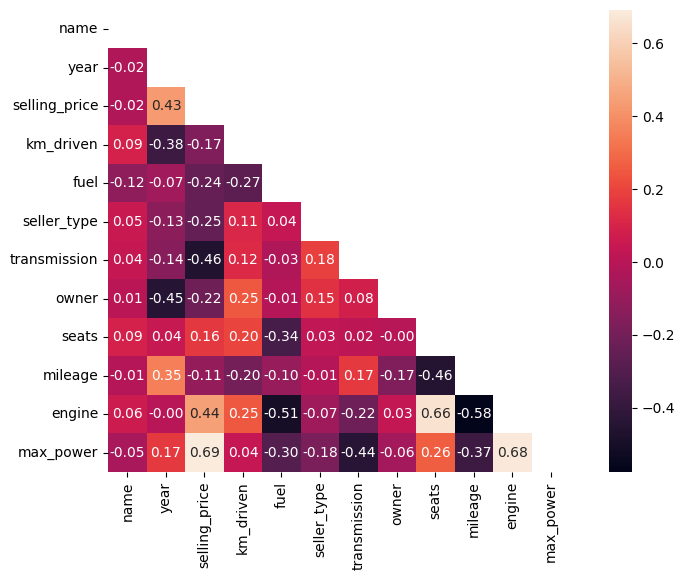

In [312]:
plt.figure(figsize=(10 , 6))
corr = df3.corr()
mask = np.triu(corr)
sns.heatmap(corr , square=True , mask = mask , annot=True , fmt = '.2f')
plt.show()

### Split dataset

In [313]:
# split data set to train and test

from sklearn.model_selection import train_test_split

X = df3.drop('selling_price', axis=1)
y = df3['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5540, 11), (1385, 11), (5540,), (1385,))

## Regression Models

#### single linear regression

In [315]:
# import library and Feature selection for train and test

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

X_train_single = X_train[['max_power']]
X_test_single = X_test[['max_power']]

In [316]:
# create object and fit the model

slr_model = LinearRegression()
slr_model.fit(X_train_single, y_train)

LinearRegression()

In [318]:
# prediction with model

y_pred_single = slr_model.predict(X_test_single)
y_pred_single

array([-0.84434219, -0.57918375,  0.02212042, ..., -0.28646554,
        0.80298069,  0.0419551 ])

In [319]:
# Evaluating the accuracy of the model using MSE and R2-Score

mse_single = mean_squared_error(y_test, y_pred_single)
r2_single = r2_score(y_test, y_pred_single)

print(f"MSE: {mse_single}")
print(f"R2: {r2_single}")

MSE: 0.728588910845476
R2: 0.4969542969743589


#### multiple linear regression

In [320]:
# create model for multiple linear regression

mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

LinearRegression()

In [321]:
# prediction y from X_test

y_pred_multi = mlr_model.predict(X_test)
y_pred_multi

array([-0.72699318, -1.25645186, -0.16022228, ...,  0.07924497,
        1.59132208,  0.14052704])

In [322]:
# Evaluating the accuracy of the model using MSE and R2-Score

mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print(f"MSE: {mse_multi}")
print(f"R2: {r2_multi}")

MSE: 0.6308131257368426
R2: 0.564462445707751


#### polynomial regression

In [336]:
# import library and create object and pipline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_features = PolynomialFeatures(degree=2)
poly_model = make_pipeline(poly_features, LinearRegression())
poly_model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [337]:
# train the model and prediction y

poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)

In [339]:
# Evaluating the accuracy of the model using MSE and R2-Score

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"MSE: {mse_poly}")
print(f"R2: {r2_poly}")

MSE: 0.24893794012675843
R2: 0.8281237070222454
